In [18]:
import matplotlib.pyplot as plt
import numpy as np

def euler(yi, ti, dt, derivs): # Euler method y_i -> y_i+1
    yiplus1 = yi + derivs(yi,ti) * dt
    return yiplus1

def decaylaw( y, time): # calc differentials
    diff0 = -y[0] / tau
    diff1 = +y[0] / tau
    return np.array([diff0, diff1])

Npi = 1000             # pion number
Nmu = 0                # muon number
tau = 26.0             # lifetime of charged pion (ns)
dt = 1.0               # size of time interval (ns)
N = 200                # time range (ns)
prob = dt/tau          # decay probability in interval dt

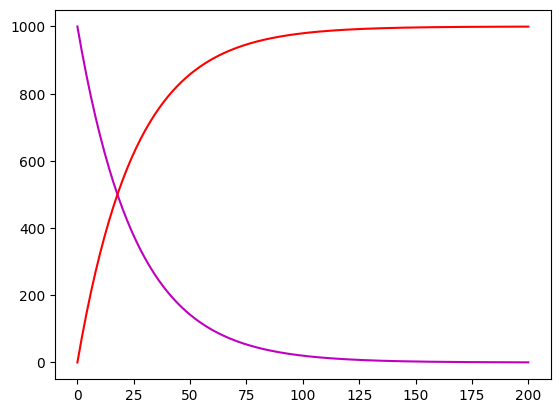

In [19]:
t = np.linspace(0, N, N) # Nx1 evenly spaced t_i time array
y = np.zeros([N,2]) # Nx2 array (N rows, 2 columns) for y_i, v_i state
y[0,0] = Npi
y[0,1] = Nmu

for j in range(N-1): # Loop over steps
    y[j+1] = euler(y[j], t[j], dt, decaylaw)

N1 = y[:,0]
N2 = y[:,1]

plt.plot(t,N1,"m")
plt.plot(t,N2,"r")

Text(0, 0.5, 'Npi, Nmu')

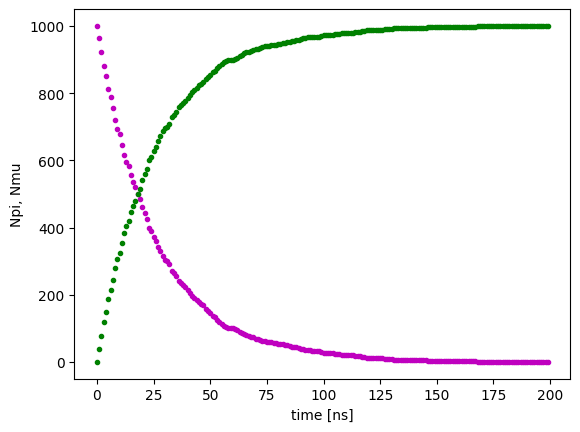

In [20]:
time = np.arange(0,N,dt,dtype=int)
Np, Nm  = np.zeros(N), np.zeros(N)

for it in time: # loop over time steps
    Np[it], Nm[it] = Npi, Nmu

    Ndcy = 0
    for ip in range(Npi): # loop over surviving pions
        if np.random.ranf() < prob:
            Ndcy += 1 # count decays in interval dt

    Npi -= Ndcy
    Nmu += Ndcy

plt.plot(time,Np,"m.")
plt.plot(time,Nm,"g.")
plt.xlabel("time [ns]")
plt.ylabel("Npi, Nmu")

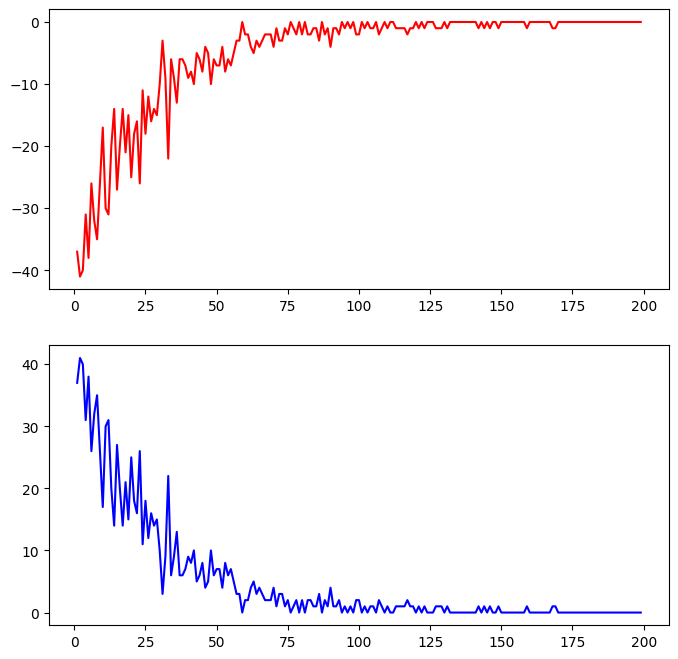

In [22]:
fig, axs = plt.subplots( 2, 1, figsize=(8, 8))

axs[0].plot(time[1:], Np[1:]-Np[:-1], "r",label="Npi")
axs[1].plot(time[1:], Nm[1:]-Nm[:-1], "b",label="Nmu")